<a href="https://colab.research.google.com/github/sabriades/Machine_Learning_Model/blob/main/RandomForestRegressor_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#2° dataset, provo a eliminare alcuni outliers per vedere se il modello migliora.
#nel precedente le performance peggiori erano di elastic modulus e tensile strain rispettivamente

import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving NANOCOMPOSITES_DATASET_HERE_2ND.csv to NANOCOMPOSITES_DATASET_HERE_2ND.csv


In [3]:
nanocomposites=pd.read_csv('NANOCOMPOSITES_DATASET_HERE_2ND.csv')
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Filler Geometry,Elastic Modulus matrix (MPa),Paper
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,Graphene nanoplatelets (GNP),3554.7,26
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,Graphene nanoplatelets (GNP),3554.7,26
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,multi-walled carbon nanotubes (MWCNT),3554.7,26


In [4]:
nanocomposites=nanocomposites.drop(['Paper','Filler Geometry'], axis=1)

In [5]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


In [6]:
nanocomposites_encoded=pd.get_dummies(nanocomposites)
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [7]:
nanocomposites.shape #righe e colonne

(117, 7)

In [8]:
nanocomposites_encoded.shape

(117, 21)

In [37]:
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


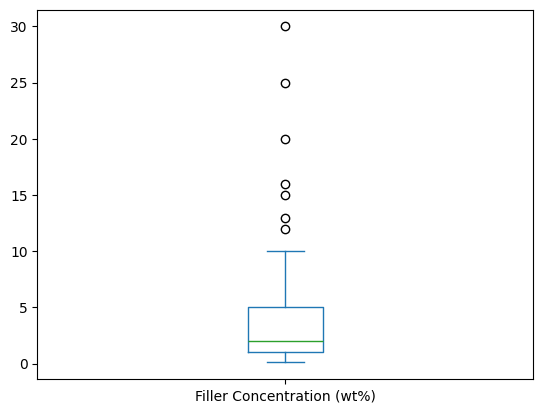

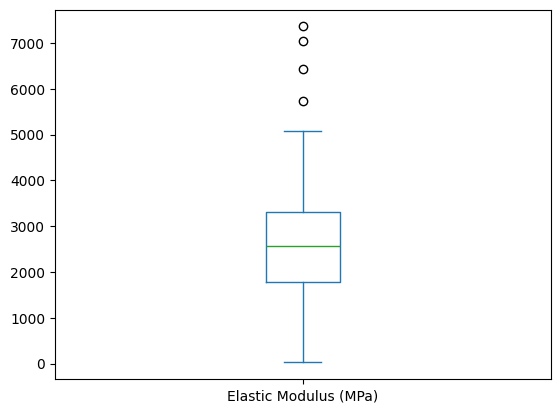

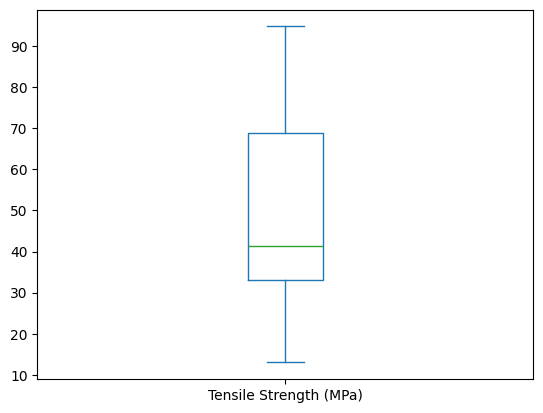

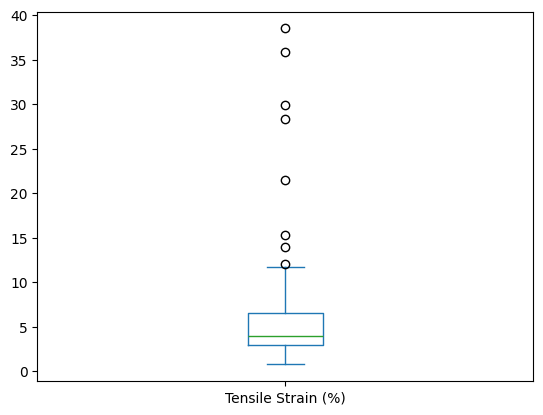

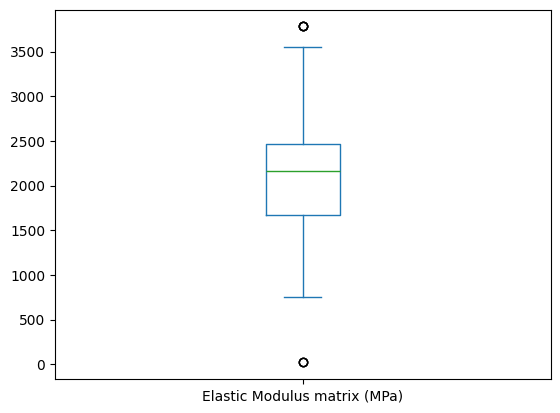

In [9]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    nanocomposites[[colonna]].plot(kind='box')

In [22]:
outliers_dict={}
outliers_idx=[]
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    Q1=nanocomposites[colonna].quantile(0.25)
    Q3=nanocomposites[colonna].quantile(0.75)
    IQR=Q3-Q1
    limite_basso=Q1-1.5*IQR
    limite_alto=Q3+1.5*IQR
    outliers_all=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)]
    outliers_index=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)].index
    outliers_idx.append(outliers_index)
    outliers_dict[colonna]=outliers_all

In [23]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler', 'Tensile Strength (MPa)']:
    print("outliers di: "+colonna)
    display(outliers_dict[colonna])

outliers di: Filler Concentration (wt%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
18,Epoxy,Nanosilica,13.0,3330.0,85.25,3.62,2750.0
19,Epoxy,Nanosilica,25.0,3800.0,88.11,3.52,2750.0
81,ABS,MWCNT,15.0,2917.3,22.00,1.80,2159.8
107,ABS,GNP,12.0,4450.0,42.40,2.50,2315.0
108,ABS,GNP,16.0,5072.0,41.60,2.00,2315.0
109,ABS,GNP,20.0,5725.0,42.90,1.90,2315.0
110,ABS,GNP,30.0,7362.0,44.30,1.30,2315.0


outliers di: Elastic Modulus (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
15,ABS,SWCNT,7.5,6434.0,40.5,2.6,2278.0
16,ABS,SWCNT,10.0,7045.0,40.3,1.8,2278.0
109,ABS,GNP,20.0,5725.0,42.9,1.9,2315.0
110,ABS,GNP,30.0,7362.0,44.3,1.3,2315.0


outliers di: Tensile Strain (%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
44,PET,TiO₂,1.0,2486.1,28.30,21.50,2467.2
45,PET,TiO₂,3.0,2561.3,30.70,28.30,2467.2
46,PET,TiO₂,5.0,2572.8,36.90,15.30,2467.2
47,PLA,TiO₂,1.0,1710.0,26.33,29.86,1840.0
48,PLA,TiO₂,3.0,1780.0,25.14,38.50,1840.0
49,PLA,TiO₂,5.0,1660.0,23.47,35.82,1840.0
76,ABS,MWCNT,1.0,2169.1,26.90,14.00,2159.8
94,ABS,GNP,2.0,2312.0,33.10,12.00,2147.0


outliers di: Elastic Modulus matrix (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
40,Epoxy,MWCNT,0.1,2823.00,42.24,1.40,3782.00
41,Epoxy,MWCNT,0.2,3345.00,62.56,1.96,3782.00
42,Epoxy,MWCNT,0.3,3680.00,63.04,2.52,3782.00
43,Epoxy,MWCNT,0.4,3684.00,28.00,0.76,3782.00
50,PET,Clay,1.0,23.93,45.00,2.07,19.59
51,PET,Clay,3.0,28.14,51.79,2.01,19.59
52,PET,Clay,5.0,25.89,41.55,1.73,19.59


In [13]:
nanocomposites_num=nanocomposites.select_dtypes(include=['float'])

In [14]:
nanocomposites_num.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,0.2,3722.4,74.2,4.4,3554.7
1,0.4,3407.2,71.1,6.2,3554.7
2,0.2,3654.5,72.4,6.9,3554.7


In [16]:
corr=nanocomposites_num.corr()
corr

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
Filler Concentration (wt%),1.000000,0.538928,-0.101851,-0.151754,0.053405
Elastic Modulus (MPa),0.538928,1.000000,0.190574,-0.152829,0.696908
Tensile Strength (MPa),-0.101851,0.190574,1.000000,-0.083400,0.349725
Tensile Strain (%),-0.151754,-0.152829,-0.083400,1.000000,0.004805
Elastic Modulus matrix (MPa),0.053405,0.696908,0.349725,0.004805,1.000000


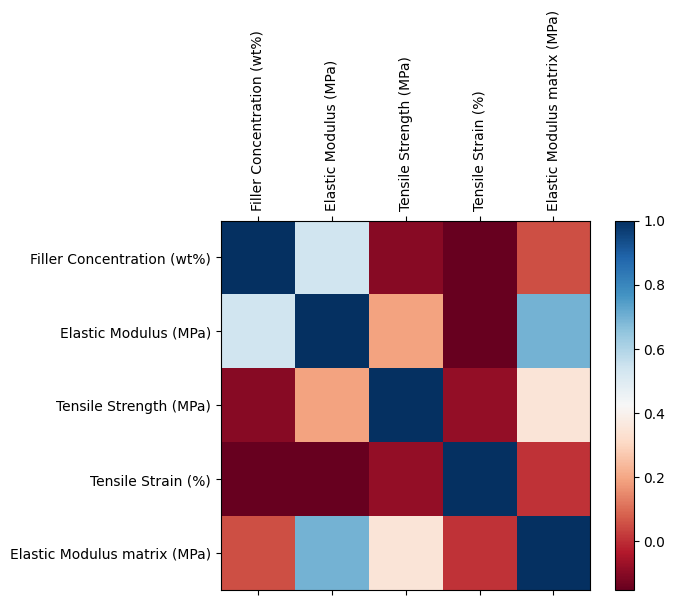

In [17]:
fig,ax=plt.subplots()
cax=ax.matshow(corr, cmap='RdBu')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(cax)
plt.show()

In [19]:
nanocomposites.shape

(117, 7)

In [36]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


In [77]:
nanocomposites_clean_out=nanocomposites

In [78]:
#nanocomposites_clean_out=nanocomposites.drop([40, 41, 42, 43, 50, 51, 52])

In [56]:
#nanocomposites_clean_out=nanocomposites.drop([18,19])

In [79]:
nanocomposites_clean_out.shape

(110, 7)

In [80]:
outliers_idx

[Index([18, 19, 81, 107, 108, 109, 110], dtype='int64'),
 Index([15, 16, 109, 110], dtype='int64'),
 Index([], dtype='int64'),
 Index([44, 45, 46, 47, 48, 49, 76, 94], dtype='int64'),
 Index([40, 41, 42, 43, 50, 51, 52], dtype='int64')]

In [31]:
#nanocomposites_clean_out=nanocomposites_clean_out.drop([44, 45, 46, 47, 48, 49]) #per ora non tolgo gli outliers di elastic modulus matrix

In [81]:
nanocomposites_clean_out.shape

(110, 7)

In [82]:
nanocomposites_clean_out_encoded=pd.get_dummies(nanocomposites_clean_out)

In [83]:
nanocomposites_clean_out_encoded.shape

(110, 21)

In [84]:
nanocomposites_clean_out_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [85]:
nanocomposites_clean_out_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO'],
      dtype='object')

In [86]:
nanocomposites_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO'],
      dtype='object')

In [87]:
X=nanocomposites_clean_out_encoded[['Filler Concentration (wt%)', 'Elastic Modulus matrix (MPa)','Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO']]
y=nanocomposites_clean_out_encoded[['Elastic Modulus (MPa)', 'Tensile Strength (MPa)', 'Tensile Strain (%)']]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #20% delle osservazioni nel testing set

In [89]:
model=RandomForestRegressor(n_estimators=500,max_features='sqrt', random_state=42, oob_score=True)

In [90]:
rf=model.fit(X_train,y_train)

In [91]:
pred_properties=rf.predict(X_test)

In [92]:
pred_properties_df=pd.DataFrame(pred_properties, columns=y_test.columns, index=y_test.index)
pred_properties_df
pred_properties_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
85,2258.293303,33.662722,9.429867
10,1296.678005,44.608226,4.555992
4,1312.524887,26.829983,4.533437


In [93]:
mask_abs_gnp=(X_test["Polymer Matrix_ABS"]==1) & (X_test["Filler_GNP"]==1)

In [94]:
X_test_abs_gnp=X_test[mask_abs_gnp]
y_test_abs_gnp=y_test.loc[mask_abs_gnp]

In [95]:
y_pred_abs_gnp=model.predict(X_test_abs_gnp)

In [96]:
y_pred_abs_gnp_df=pd.DataFrame(y_pred_abs_gnp, columns=y_test_abs_gnp.columns, index=y_test_abs_gnp.index)
y_pred_abs_gnp_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
85,2258.293303,33.662722,9.429867
91,2258.293303,33.662722,9.429867
71,2357.372179,36.325168,4.370792


In [97]:
mae=mean_absolute_error(y_test_abs_gnp,y_pred_abs_gnp)
rmse=np.sqrt(mean_squared_error(y_test_abs_gnp,y_pred_abs_gnp))
r2=r2_score(y_test_abs_gnp,y_pred_abs_gnp)
print("Valutazione SOLO su ABS+GNP:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Valutazione SOLO su ABS+GNP:
MAE: 127.94220087611977
RMSE: 273.908504612017
R2: 0.4418784634726509


In [98]:
for colonna in y_pred_abs_gnp_df:
  mae_each_target=mean_absolute_error(y_true=y_test_abs_gnp[colonna], y_pred=y_pred_abs_gnp_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test_abs_gnp[colonna], y_pred=y_pred_abs_gnp_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test_abs_gnp[colonna], y_pred=y_pred_abs_gnp_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target)) #togliere gli outliers implica riduzione dei dati e il modello, avendo a disposizione già poche osservazioni, soffre
  #in queste circostanze si conservano tutti gli outliers

Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 377.422905630789
RMSE di Elastic Modulus (MPa) : 474.3627093972357
R2 di Elastic Modulus (MPa) : 0.4204475183396862
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 5.0357078046028425
RMSE di Tensile Strength (MPa) : 7.407689015538711
R2 di Tensile Strength (MPa) : 0.20658639070606322
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.367989192967531
RMSE di Tensile Strain (%) : 1.659148316697619
R2 di Tensile Strain (%) : 0.6986014813722032
